# Final Project

Name: Yushan Wang
ID:   A14459085

# Abstract: 
 Several supervised learning methods have been learned and implemented in the lectures of COGS 118A. This document presents a ranking of four supervised learning methods: SVMs, Logistic Regression, Decision Tree, KNN. The experiment  uses four data sets with different magnitudes as a variety of performance criteria to evaluate the four learning methods

# Pre Import

In [2]:
#import all the packages needed for the project
%config InlineBackend.figure_format = 'retina' 
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import all the packages needed for data visualization

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 

# Data source

The data sets used in this report are downloaded from Kaggle.
There are four data sets which have been used.

    Data Set 1: ex2data2.csv
    https://www.kaggle.com/msjaiclub/2classclassification
    using x and y predict labels

    Data Set 2: data_banknote_authentication.txt
    https://machinelearningmastery.com/standard-machine-learning-datasets/
    using Mean of the integrated profile and Mean of the DM-SNR curve to predict is there a pulsar star or not
    by setting exist = 1, otherwise = -1

    Data Set 3; winemag-data_first150k.csv
    https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
    using price and points to predict country by setting us = 1 others = -1
    
    Data Set 4: appstore_games.csv
    https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games
    using Average User Rating and User Rating Count to predict the game is free or not
    by setting free = -1 otherwise =1

# Import Database needed for the project

In [3]:
# import data set 1
data_one_name = 'ex2data2.csv'
data_one = pd.read_csv(data_one_name)
data_one = data_one.rename(columns={'x': 1, 'y': 2,'label': 3})
data_one[3][data_one[3] != 1] = -1
#preview of partial data 
data_one.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,1,2,3
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
#import data set 2
data_two_name = 'data_banknote_authentication.txt'
data_two = pd.read_csv(data_two_name, sep =',',names=[1, 2, 3,4,5])
#preview of partial data
data_two.head(5)

,1,2,3,4,5
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
features = [1, 2, 3,4]
x = data_two.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_two[5]:
    if each == 0:
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_two = principalDf
data_two.head(5)

,1,2,3
0,-8.117954,-2.372615,-1
1,-7.800124,-2.689555,-1
2,3.690195,-4.372720,-1
3,-9.908612,-0.978030,-1
4,6.957545,-0.733813,-1


In [6]:
#import data set 3
data_three_name = 'MAGIC_Gamma_Telescope_Data.csv'
data_three = pd.read_csv(data_three_name)
#preview of partial data
data_three.head(5)

,Flength,Fwidth,Fsize,Fconc,Fconc1,Fasym,Fm3long,Fm3trans,Falpha,Fdist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
# data preperation for data set 3
features = list(data_three.columns)
target_name = features.pop()

x = data_three.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_three[target_name]:
    if each == 'g':
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_three = principalDf
data_three.head(5)

,1,2,3
0,-117.847561,14.908435,-1
1,-10.030204,-39.384964,-1
2,58.822043,-40.773779,-1
3,-86.684872,12.502957,-1
4,147.281560,-75.051486,-1


In [8]:
#import data set 3
data_four_name = 'Skin_NonSkin.txt'
data_four = pd.read_csv(data_four_name,delimiter='\t', header=None, names=[1, 2, 3,4])
#preview of partial data 
data_four.head(5)

,1,2,3,4
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [9]:
# data preperation for data set 4
sorted(data_four)
features = list(data_four.columns)
features.pop()

x = data_four.loc[:,features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1,2])
targets = []
for each in data_four[4]:
    if each == 2:
        targets.append(int(-1))
    else:
        targets.append(int(1))
principalDf[3] = targets
data_four = principalDf
data_four.head(5)

,1,2,3
0,-54.534011,43.056629,1
1,-56.262857,43.161601,1
2,-57.991704,43.266572,1
3,-61.449398,43.476516,1
4,-61.449398,43.476516,1


In [10]:
print(data_one.shape)      # it should be (118,3)
print(data_two.shape)      # it should be (17898, 3)
print(data_three.shape)    # it should be (150930, 3)
print(data_four.shape)     # it should be 97561, 3)

(118, 3)
(1372, 3)
(19020, 3)
(245057, 3)


# Six classifiers on data set 1
    1.Logistic Regression
    
    2.Decision Tree Classifier
    
    3.Gaussian Naive Bayes
    
    4.SVC
    
    5.KNN the best k out of 26 trials (range from 1 to size(dataset))
    
    6.Voting classifier (best from hard and soft)

In [12]:
clf1 = LogisticRegression(random_state=42, solver='lbfgs')
clf2 = DecisionTreeClassifier()
clf4 = SVC(kernel = 'rbf')
clf3 = GaussianNB() 
clf5 = KNeighborsClassifier(n_neighbors=1)
estimator = [('LR',clf1),('DT',clf2),('Gaussian',clf3),('SVM',clf4),('KNN',clf5)] 
clf6 = VotingClassifier(estimators = estimator, voting ='hard') 
clf6 = VotingClassifier(estimators = estimator, voting ='soft') 
classifiers = [clf1, clf2, clf3, clf4,clf5,clf6]

# visualization

In [13]:
 def vis(X, Y, W=None, b=None):     
        indices_neg1 = (Y == -1).nonzero()[0]     
        indices_pos1 = (Y == 1).nonzero()[0]     
        plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],                  
                    c='blue', label='class -1')     
        plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],                  
                    c='red', label='class 1')     
        plt.legend()     
        plt.xlabel('$x_0$')     
        plt.ylabel('$x_1$')          
        if W is not None:         
            # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1         
            w0 = W[0]         
            w1 = W[1]         
            temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0         
            x0_min = max(temp.min(), X[:,0].min())         
            x0_max = min(temp.max(), X[:,1].max())         
            x0 = np.linspace(x0_min,x0_max,100)         
            x1 = -w0*x0/w1-b/w1         
            plt.plot(x0,x1,color='black') 
        plt.show()

# error

In [14]:
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X) 
    e = 1-accuracy_score(Y, Y_pred) 
    return e

# Logistic regression

(118, 2)
(118, 1)
(100, 2)
(100,)


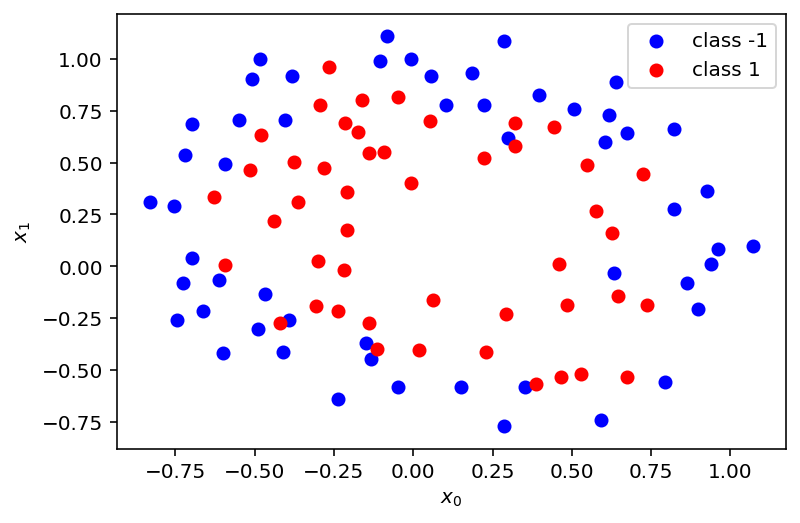

In [15]:
data_one = data_one.iloc[:,:]
X = data_one[[1,2]].values
Y = data_one[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train = X_shuffled[:100,:]
Y_train = Y_shuffled[:100]
print(X_train.shape)      
print(Y_train.shape)    
vis(X_train,Y_train)

classifier: Logistic Regression
0.77 & 0.7415730337078652& 0.7661030595813205
classifier: Decision Tree Classifier
1.0 & 1.0& 1.0
classifier: Gaussian Naive Bayes
0.76 & 0.7209302325581396& 0.7536231884057971
classifier: SVC
0.82 & 0.7906976744186046& 0.8140096618357487
classifier: KNN
1.0 & 1.0& 1.0


AttributeError: predict_proba is not available when  probability=False

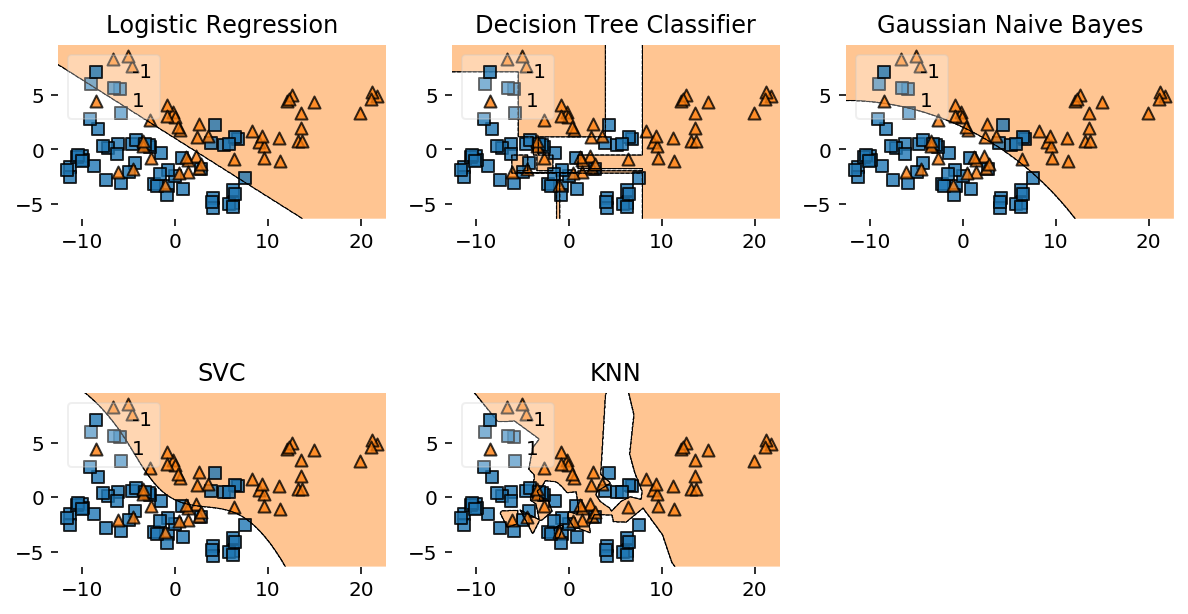

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=3, ncols=3, hspace =1)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','hard','soft']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1,2],[0,1,2])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_train,Y_train, clf)
    f1 = f1_score(Y_train, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_train, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=Y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(1372, 2)
(1372, 1)
(100, 2)
(100,)


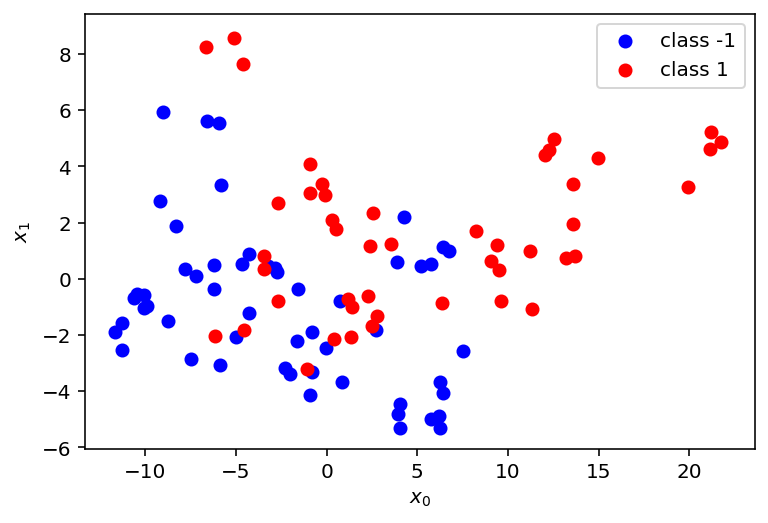

In [17]:
data_two = data_two.iloc[:,:]
X = data_two[[1,2]].values
Y = data_two[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train = X_shuffled[:100,:]
Y_train = Y_shuffled[:100]
print(X_train.shape)      
print(Y_train.shape)   
vis(X_train,Y_train)

classifier: ovo
0.77 & 0.7415730337078652& 0.7661030595813205
classifier: rbf
1.0 & 1.0& 1.0
classifier: linear
0.76 & 0.7209302325581396& 0.7536231884057971
classifier: gamma
0.92 & 0.909090909090909& 0.9162640901771336


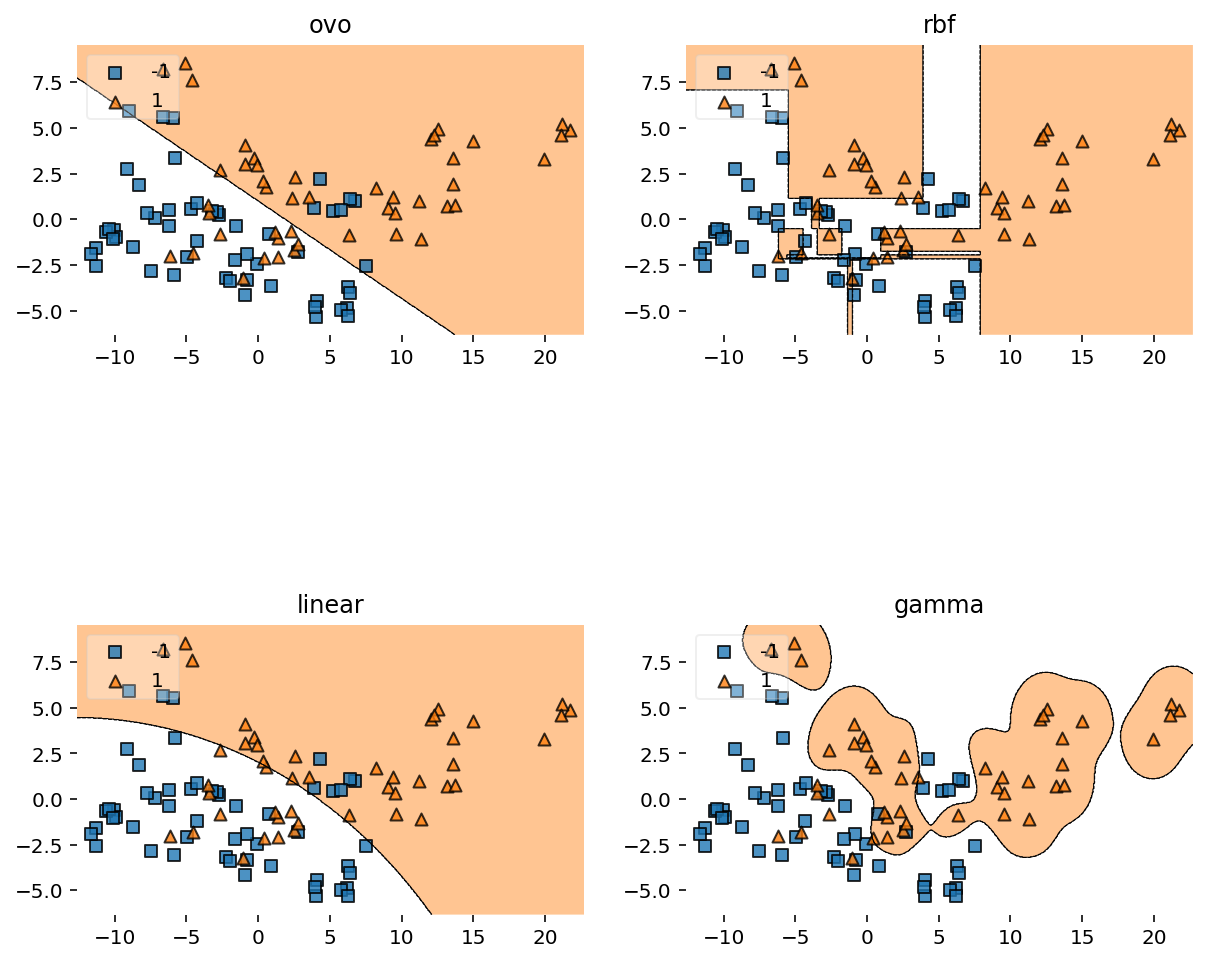

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=2, hspace =1)

fig = plt.figure(figsize=(10,8))

#labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
labels = ['ovo','rbf','linear','gamma']
clf1 = svm.SVC(decision_function_shape='ovo')
clf2 = svm.SVC(kernel='rbf')
clf3 = svm.SVC(kernel='linear')
clf4 = svm.SVC(gamma='auto')
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_train,Y_train, clf)
    f1 = f1_score(Y_train, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_train, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=Y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(19020, 2)
(19020, 1)
(100, 2)
(100,)


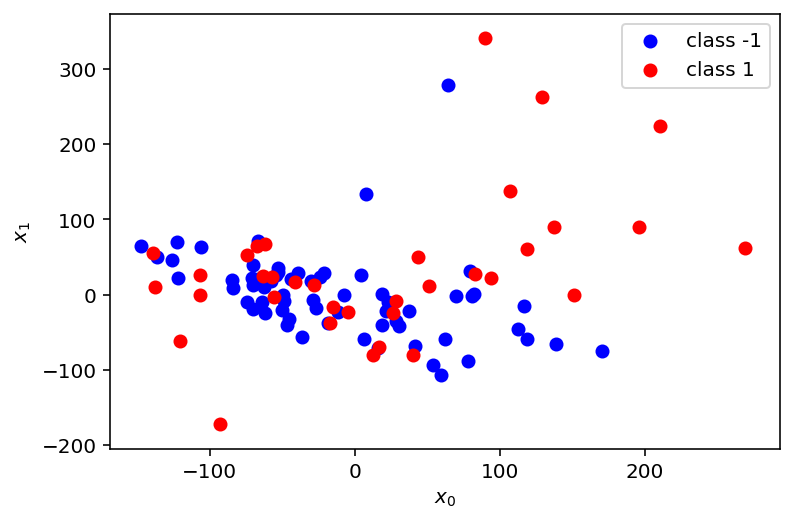

In [25]:
data_three = data_three.iloc[:,:]
X = data_three[[1,2]].values
Y = data_three[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train = X_shuffled[:100,:]
Y_train = Y_shuffled[:100]
print(X_train.shape)      
print(Y_train.shape)  
vis(X_train,Y_train)

classifier: ovo
0.71 & 0.3555555555555555& 0.5989010989010989
classifier: rbf
1.0 & 1.0& 1.0
classifier: linear
0.71 & 0.40816326530612246& 0.612087912087912
classifier: gamma
1.0 & 1.0& 1.0


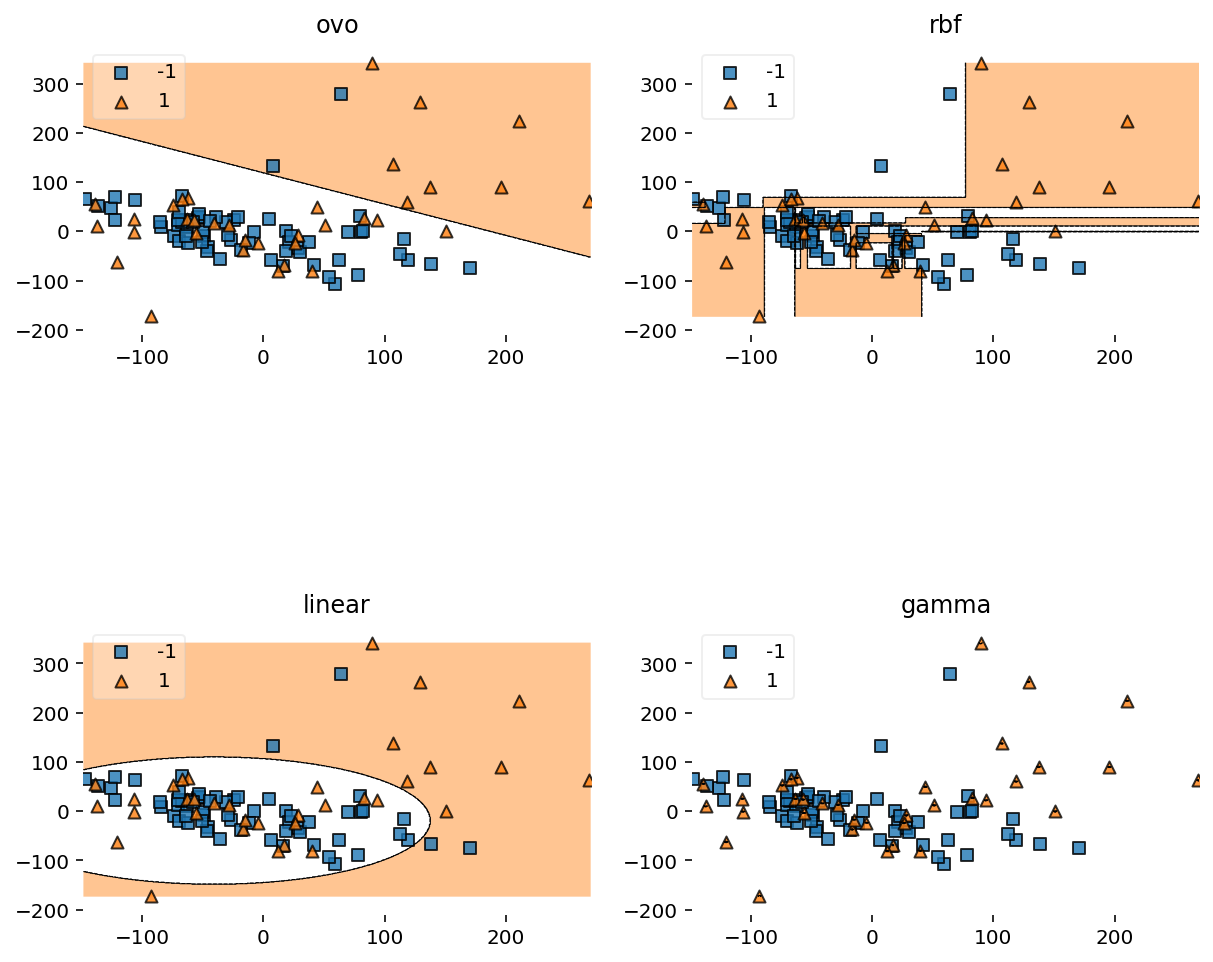

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=2, hspace =1)

fig = plt.figure(figsize=(10,8))

#labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
labels = ['ovo','rbf','linear','gamma']
clf1 = svm.SVC(decision_function_shape='ovo')
clf2 = svm.SVC(kernel='rbf')
clf3 = svm.SVC(kernel='linear')
clf4 = svm.SVC(gamma='auto')
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1])):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_train,Y_train, clf)
    f1 = f1_score(Y_train, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_train, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=Y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

(245057, 2)
(245057, 1)
(100, 2)
(100,)


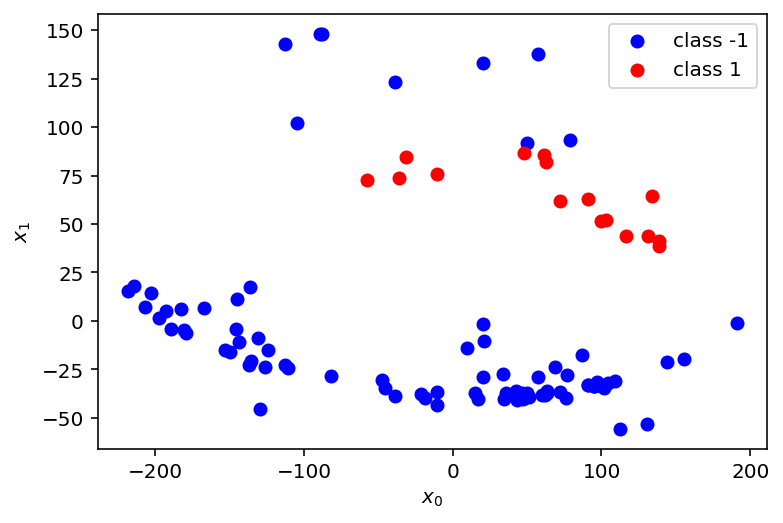

In [27]:
data_four = data_four.iloc[:,:]
X = data_four[[1,2]].values
Y = data_four[[3]].values
X_and_Y = np.hstack((X, Y)) # Stack them together for shuffling.
np.random.seed(1) # Set the random seed.
np.random.shuffle(X_and_Y) # Shuffle the data points in X_and_Y array
print(X.shape)      #(118,2)
print(Y.shape)      #(118,1)

X_shuffled = X_and_Y[:,:2]
Y_shuffled = X_and_Y[:,2]
Y_shuffled = Y_shuffled.astype(int)
X_train = X_shuffled[:100,:]
Y_train = Y_shuffled[:100]
print(X_train.shape)      
print(Y_train.shape)  
vis(X_train,Y_train)

classifier: ovo
0.91 & 0.7272727272727272& 0.8452380952380952
classifier: rbf
1.0 & 1.0& 1.0
classifier: linear
0.93 & 0.7586206896551724& 0.8318452380952381
classifier: gamma
1.0 & 1.0& 1.0


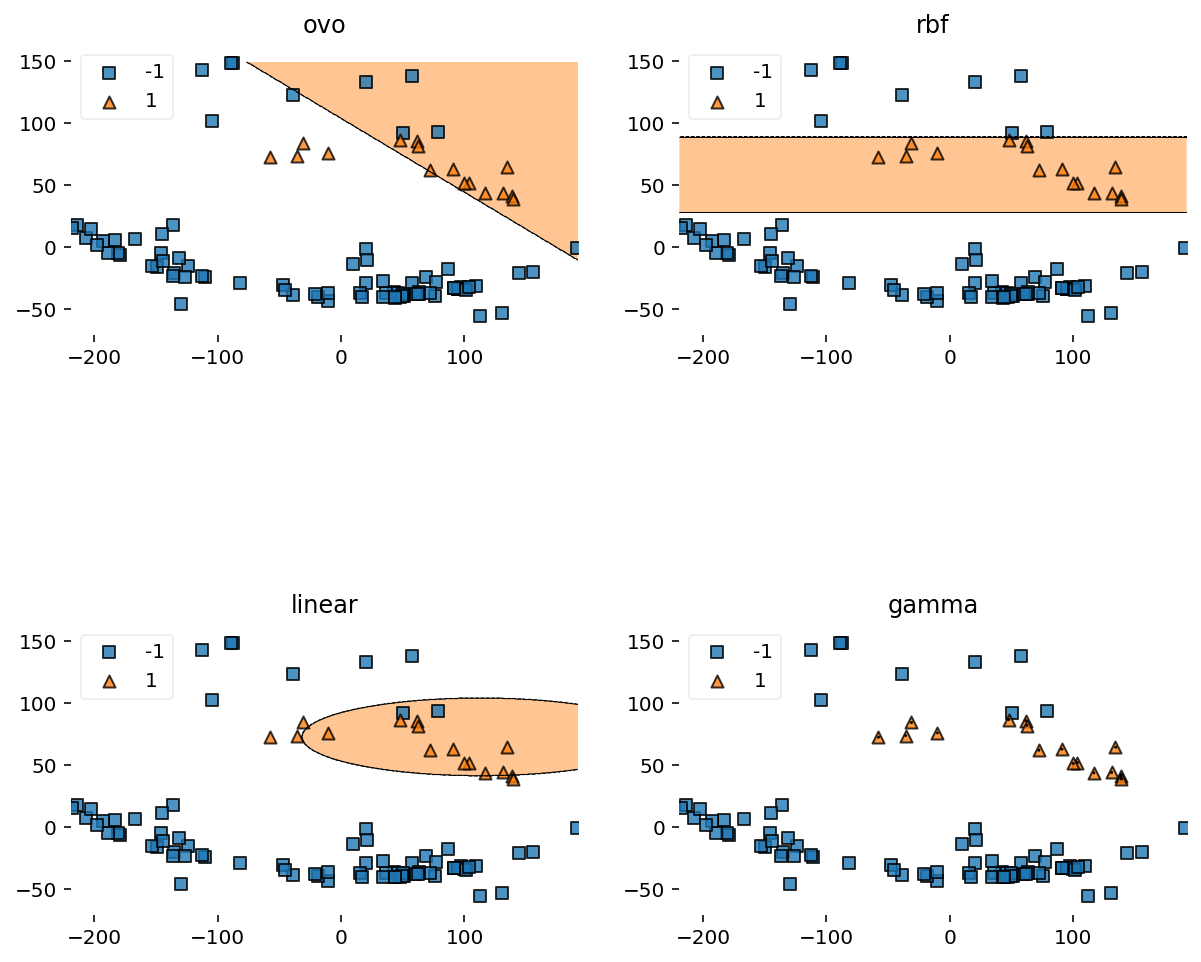

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

gs = gridspec.GridSpec(nrows=2, ncols=2, hspace =1)

fig = plt.figure(figsize=(10,8))

#labels = ['Logistic Regression','Decision Tree Classifier','Gaussian Naive Bayes','SVC','KNN','Voting']

#labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
labels = ['ovo','rbf','linear','gamma']
clf1 = svm.SVC(decision_function_shape='ovo')
clf2 = svm.SVC(kernel='rbf')
clf3 = svm.SVC(kernel='linear')
clf4 = svm.SVC(gamma='auto')
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0,1],[0,1])):

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train) 
    print('classifier: {}'.format(lab))
    acc1 = 1-calc_error(X_train,Y_train, clf)
    f1 = f1_score(Y_train, Y_pred, average = 'binary')
    roc1 = roc_auc_score(Y_train, Y_pred)
    print('{} &'.format(acc1),'{}&'.format(f1),'{}'.format(roc1))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=Y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()